In [ ]:
# regression predicting the values continuously
# it solves regression problems and line is straight and it use continuous variables.
# for examle redicting tomorrows temperature
# where logistic regression is for classification problems and it uses discrete variables. predicting type of weather tomorrow 
# in this example i am taking house dataset

In [ ]:
# exploring our data and make visualizations
# train and create a model
# evaluate the model
# making the predictions
# what if we consider more/less features

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
house =  pd.read_csv("C:\\d disk\\machine learning\\house_data.csv")

In [6]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# so, it is containing total 21612 samples

In [ ]:
# dataframe contains type of data ,number of samples ,how many coloumns etc
# and to see dataframe

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


In [ ]:
# to see some statistics like mean , standard deviation etc

In [9]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# if we want only headings of columns

In [13]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# lets vusualize the databetween sqft_living and price

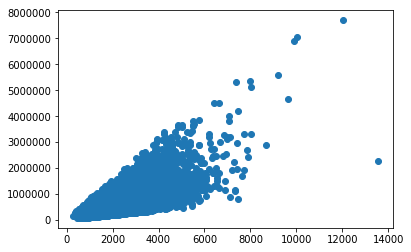

In [15]:
plt.scatter(house.sqft_living,house.price)

Text(0,0.5,'house_price')

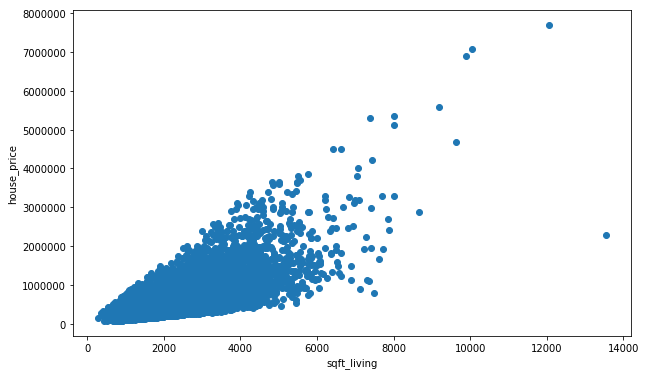

In [22]:
plt.figure(figsize = (10,6))
plt.scatter(house.sqft_living,house.price)
plt.xlabel('sqft_living')
plt.ylabel('house_price')

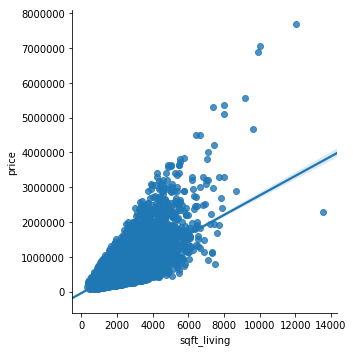

In [23]:
sns.lmplot('sqft_living','price',data = house)

In [ ]:
# to see heatmap

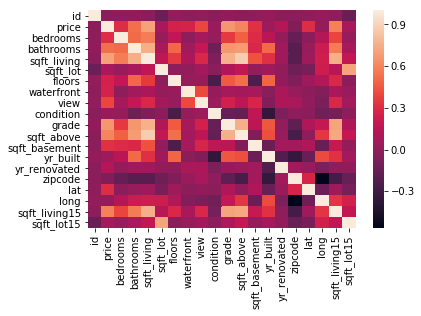

In [25]:
sns.heatmap(house.corr())

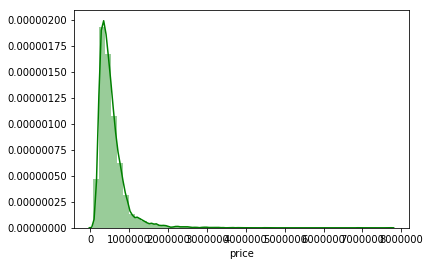

In [26]:
sns.distplot(house['price'],color = 'green')

In [ ]:
# boxplot visualization 

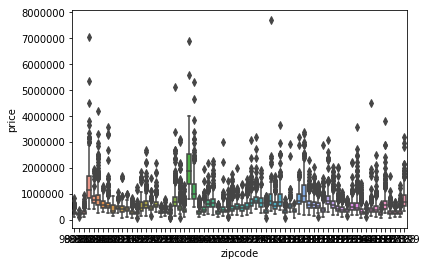

In [28]:
sns.boxplot(x = 'zipcode' , y = 'price' , data = house)

In [29]:
# preparing the data for training
X = house[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_basement', 'yr_built','condition', 'zipcode']]
y = house['price']

In [30]:
X.shape

(21613, 10)

In [ ]:
total 21613 rows and 10 coloumns (i.e 10 features)

In [31]:
y.shape

(21613,)

In [ ]:
# to train our model import sklearn library

In [35]:
from sklearn.cross_validation import train_test_split

C:\Users\DELL\anaconda35.0.1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
# traing and testing if we dont mention test_size by default it takes 75% for training and 
# 25% for testing
# random_state is for every time getting same result

In [36]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size = 0.3)

In [39]:
print(X_train.shape , y_train.shape)

(15129, 10) (15129,)


In [40]:
X_test.shape

(6484, 10)

In [41]:
y_test.shape

(6484,)

In [ ]:
# now creating our model
# import algorithm from sklearn

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()

In [ ]:
# now fit the model this will train our model

In [44]:
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
prediction = model.predict(X_test)

# now evaluate our model

In [48]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# copy the id value for single house features

In [50]:
house1 = house[house['id'] ==6414100192  ]

In [51]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639


In [53]:
house1['price']

1    538000
Name: price, dtype: int64

In [54]:
prediction[1]

601110.5979526313

In [ ]:
# lets vusualize graph for y_test and predicted price value

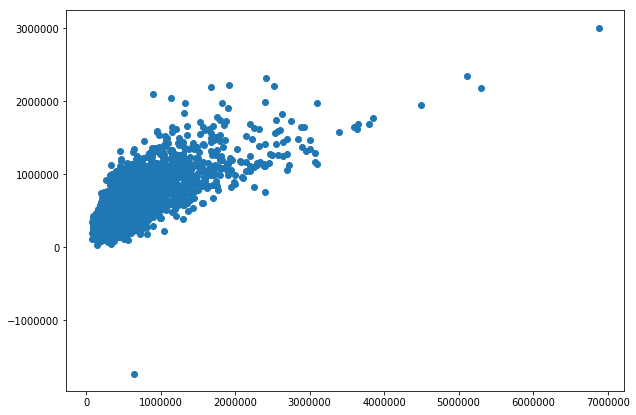

In [56]:
plt.figure(figsize = (10,7))
plt.scatter(y_test , prediction )

# co efficient value

In [ ]:
# it tells us for example if increase in one bedroom in the features 
# it tells us how much the price is increased for 1 additional bathroom 
# this can be calculated by coefficient

In [57]:
model.coef_

array([ -7.36358676e+04,   6.25835922e+04,   2.02682197e+02,
        -3.03794486e-01,   5.33443317e+04,   1.04145575e+02,
         9.85366223e+01,  -3.14498193e+03,   1.73251396e+04,
         7.54117206e+01])

In [58]:
dataframe_coef = pd.DataFrame(model.coef_ , X.columns ,columns =['coeffic value'])

In [59]:
dataframe_coef

,coeffic value
bedrooms,-73635.867566
bathrooms,62583.592239
sqft_living,202.682197
sqft_lot,-0.303794
floors,53344.331703
sqft_above,104.145575
sqft_basement,98.536622
yr_built,-3144.981929
condition,17325.139630
zipcode,75.411721


In [ ]:
# model.intercept method is for to see where the line crosses the y-axis

In [60]:
model.intercept_

-1312027.1609444991

# RMSE

In [ ]:
# to calculate the mean square error between actual and predicted

In [74]:
from sklearn import metrics

In [78]:
mean_sq_err = metrics.mean_squared_error(y_test,prediction)

In [83]:
RMSE = np.sqrt(mean_sq_err)

In [84]:
RMSE

250166.89228767675